# DataSets : Jamalon and Neelwfurat ( best selling books of 2019 and 2018)

In [2016]:
import re
import requests
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Two datsets from two different sites.(Actually 4 dataset)
#Each one contains best sellers in 2019 and 2018
##JAMALON and NEELWFURAT one of the Biggest Online Arabic Bookstore

In [1921]:
#Bookstore1
#best sellers in 2019

pages = []
BookName19 = []
for i in range(0, 20):
    url = 'https://jamalon.com/ar/best-seller-books-2019?p=' + str(i) 
    pages.append(url)

for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text,'lxml')
    name = soup.find_all('div', attrs={'class':'book-info text-center'})
    for i in name:
        BookName19.append(i.find('h4').text)


In [1922]:

pages = []
BookPrice19 = []
for i in range(0, 20):
    url = 'https://jamalon.com/ar/best-seller-books-2019?p=' + str(i) 
    pages.append(url)

for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text,'lxml')
    price = soup.find_all('div', attrs={'class':'new-price'})
    for section in price:
        BookPrice19.append(section.find('span').text)

In [1924]:
#Bookstore1
#best sellers in 2018
respone = requests.get('https://jamalon.com/ar/top-100-selling-books-for-2017')
htmlR = respone.text
soupR = BeautifulSoup(htmlR,'lxml')

In [1925]:
BookName18 = []
price = soupR.find_all('div',attrs={'class':'book-info text-center'})
for section in price:
    BookName18.append(section.find('h4').text)

In [1926]:
BookPrice18 = []
price = soupR.find_all('div', attrs={'class':'new-price'})
for section in price:
    BookPrice18.append(section.find('span').text)

In [1936]:
b19 = pd.DataFrame({'BookName2019': BookName19, 'BookPrice2019':BookPrice19 })

b19['BookPrice2019'] = (b19['BookPrice2019'].replace('SR','', regex = True))
b19['BookPrice2019']=b19.BookPrice2019.astype('float')

In [1937]:
b18 = pd.DataFrame({'BookName2018': BookName18, 'BookPrice2018':BookPrice18 })

b18['BookPrice2018'] = (b18['BookPrice2018'].replace('SR','', regex = True))
b18['BookPrice2018']=b18.BookPrice2018.astype('float')

In [1942]:
book1 = pd.concat([b19, b18], axis=1, sort=False)

In [1943]:
book1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
BookName2019     400 non-null object
BookPrice2019    400 non-null float64
BookName2018     99 non-null object
BookPrice2018    99 non-null float64
dtypes: float64(2), object(2)
memory usage: 12.6+ KB


In [1945]:
#Bookstore 1 dataset(best seller 2018 & 2019)
book1.head()

,BookName2019,BookPrice2019,BookName2018,BookPrice2018
0,Shusmo شسمو,56.25,القوقعة : يوميات متلصص,41.25
1,القوقعة : يوميات متلصص,41.25,أولاد حارتنا,73.50
2,قوة عقلك الباطن,52.50,الرجال من المريخ النساء من الزهرة,48.00
3,مع النبي صلى الله عليه وسلم,45.00,الإسلام بين الشرق والغرب,71.25
4,"سلسلة أغنية الجليد والنار : لعبة العروش, صدام ...",56.18,حيونة الإنسان,37.50


In [1946]:
sbook1.to_csv (r'C:\Users\ASUS\Desktop\DSI\week8\day3\book1.csv', index = False, header=True)

In [1947]:
def getHTMLContent(link):
    html = urlopen(link)
    soup = BeautifulSoup(html, 'html.parser')
    return soup

In [1948]:
#site1
#best sellers in 2019
content = getHTMLContent('https://www.neelwafurat.com/BBestSellers.aspx?search=books')
bookname19_2 = content.find_all('a',attrs={'style':'font-size: 12pt; color:#58595b;font-weight:bold;'})

del bookname19_2[:48]
del bookname19_2[100:]

In [1949]:
content = getHTMLContent('https://www.neelwafurat.com/BBestSellers.aspx?search=books')
bookprice19_2 = content.find_all('font',attrs={'style':'font-family: Tahoma; color: red;'})

del bookprice19_2[:48]
del bookprice19_2[100:]

In [1950]:
#best sellers in 2018
content = getHTMLContent('https://www.neelwafurat.com/BBestSellers.aspx?search=books&year=2018')
bookname18_2 = content.find_all('a',attrs={'style':'font-size: 12pt; color:#58595b;font-weight:bold;'})

del bookname18_2[:48]
del bookname18_2[100:]

In [1951]:
content = getHTMLContent('https://www.neelwafurat.com/BBestSellers.aspx?search=books&year=2018')
bookprice18_2 = content.find_all('font',attrs={'style':'font-family: Tahoma; color: red;'})

del bookprice18_2[:48]
del bookprice18_2[100:]

In [1959]:
book2 = pd.DataFrame({'bookname2019_2': bookname19_2,'bookprice2019_2': bookprice19_2 , 'bookname2018_2': bookname18_2,'bookprice2018_2': bookprice18_2})

book2['bookname2019_2'] = book2['bookname2019_2'].map(lambda x: str(x)[145:])
book2['bookname2019_2'] = book2['bookname2019_2'].map(lambda x: str(x)[0:-4])
book2['bookprice2019_2'] = book2['bookprice2019_2'].map(lambda x: str(x)[50:66])
book2['bookprice2019_2'] = book2['bookprice2019_2'].map(lambda x: str(x)[0:-11])

book2['bookname2018_2'] = book2['bookname2018_2'].map(lambda x: str(x)[145:])
book2['bookname2018_2'] = book2['bookname2018_2'].map(lambda x: str(x)[0:-4])
book2['bookprice2018_2'] = book2['bookprice2018_2'].map(lambda x: str(x)[50:66])
book2['bookprice2018_2'] = book2['bookprice2018_2'].map(lambda x: str(x)[0:-11])

book2['bookname2019_2'] = (book2['bookname2019_2'].replace('[<,>]','', regex = True))
book2['bookname2018_2'] = (book2['bookname2018_2'].replace('[<,>]','', regex = True))
book2['bookprice2019_2'] = (book2['bookprice2019_2'].replace('[SA,S]','', regex = True))
book2['bookprice2018_2'] = (book2['bookprice2018_2'].replace('[SA,S]','', regex = True))
book2['bookprice2019_2']=book2.bookprice2019_2.astype('float')
book2['bookprice2018_2']=book2.bookprice2018_2.astype('float')

In [1960]:
#Bookstore2 dataset(best seller 2018 & 2019)
book2.head()

,bookname2019_2,bookprice2019_2,bookname2018_2,bookprice2018_2
0,أربعون 40,51.00,الطفل في الأسرة,26.25
1,ناقة صالحة,37.50,الطهارة,18.45
2,سيدات القمر,32.06,"المغالطات المنطقية ""فصول في المنطق غير الصوري""",46.88
3,"الإنسان يبحث عن المعني ""مقدمة في العلاج بالمعن...",26.25,الكتاب والقرآن - رؤية جديدة,54.00
4,إن مع الصبر نصراً,44.63,يونة الإنسان,35.63


In [1961]:
book2.to_csv (r'C:\Users\ASUS\Desktop\DSI\week8\day3\book2.csv', index = False, header=True)

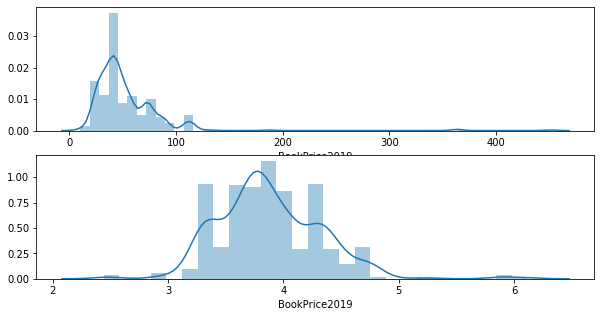

In [2033]:
#Bookstore2 book price
fig,ax = plt.subplots(2,figsize=(10,5))
sns.distplot(book1["BookPrice2019"],ax=ax[0])
sns.distplot(np.log1p(b19['BookPrice2019']),ax=ax[1])

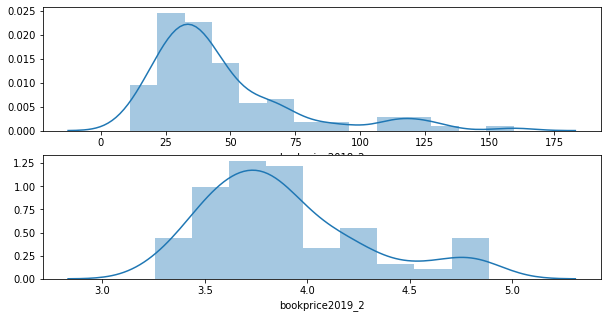

In [2024]:
#Bookstore2 book price
fig,ax = plt.subplots(2,figsize=(10,5))
sns.distplot(book2["bookprice2018_2"],ax=ax[0])
sns.distplot(np.log1p(book2["bookprice2019_2"]),ax=ax[1])

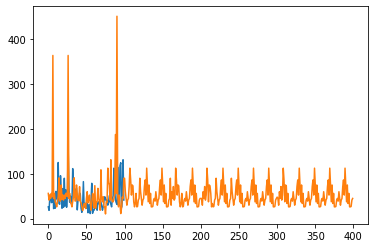

In [2037]:
plt.plot (book2["bookprice2018_2"])
plt.plot (b19['BookPrice2019'])